In [1]:
import pandas as pd

Meter A PSA

In [2]:
# Load and check data

dataframeA = pd.read_csv('6. Dataset PCA File/MeterA_pca.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

PCA_A_DF = dataframeA[['PC1','PC2','PC3','PC4','Class Attruibute']]

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

#featuresVector
PCA_A_DF

,PC1,PC2,PC3,PC4,Class Attruibute
0,3.260141,-2.019053,-0.500833,0.376386,1
1,2.522897,-1.183668,1.048861,0.230119,1
2,1.417243,-1.047656,1.419688,-0.303846,1
3,0.170745,-1.351670,-0.220119,-0.070667,1
4,-0.003489,-1.337765,-0.856443,0.497518,1
...,...,...,...,...,...
78,-0.939126,2.472891,0.423022,0.291323,2
79,-0.924759,2.613474,0.499742,0.533907,2
80,-1.578888,2.270228,0.789015,0.135464,2
81,-1.168676,1.980522,-0.046133,0.045459,2


Observation:

The first 3 users liked action movies (Avenger and X-Men) while the last 3 users enjoyed horror movies (The Ring and Train to Busan).

Our objective is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the multidimensional(4 features) movie ratings data.

We must remove the "user" column first before applying the clustering algorithm.

The cluster assignment for each user will be displayed as a dataframe object.

In [3]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
PCA_A_train, PCA_A_test, yLbl_train, yLbl_test = train_test_split(PCA_A_DF, yLbl, test_size=0.3, random_state=12)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

In [4]:
print("Training Set")
PCA_A_train

Training Set


,PC1,PC2,PC3,PC4,Class Attruibute
61,-1.970874,-0.580092,1.275068,-0.029137,2
26,-1.437275,-0.601019,-0.858318,-0.465475,1
10,-1.416539,-0.934425,-0.206227,0.134563,1
79,-0.924759,2.613474,0.499742,0.533907,2
78,-0.939126,2.472891,0.423022,0.291323,2
77,-0.357974,2.777650,0.209262,0.709057,2
41,0.337190,-0.030662,-1.053593,-0.679246,2
54,0.174495,-1.245530,0.411585,0.505433,2
39,0.477607,0.146737,-0.204185,-0.535319,2
36,0.372692,0.251641,-1.220735,-0.346337,2


In [5]:
print("Testing Set -30%")
PCA_A_test 

Testing Set -30%


,PC1,PC2,PC3,PC4,Class Attruibute
17,3.161152,-0.874699,0.789128,-1.239686,1
19,1.621657,-0.279962,0.803739,-0.446374,1
43,-2.013132,0.301588,-0.422036,-1.219749,2
47,-1.462822,0.688947,-0.254128,-0.407737,2
12,-1.154813,-0.284567,-0.246444,0.346348,1
8,1.315489,-0.949043,-1.022961,0.843504,1
44,-1.661067,0.326766,-0.418184,-0.992460,2
23,0.753765,-0.841173,-0.470973,0.829291,1
14,-1.769969,-0.506172,0.073557,0.326261,1
7,0.492671,-1.204590,-0.559118,0.229493,1


    Class Attruibute
17                 1
19                 1
43                 2
47                 2
12                 1
8                  1
44                 2
23                 1
14                 1
7                  1
64                 2
31                 1
59                 2
28                 1
56                 2
68                 2
21                 1
71                 2
72                 2
37                 2
57                 2
69                 2
42                 2
58                 2
29                 1


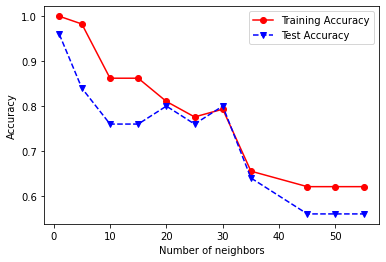

In [6]:
# next, we'll apply a knn algorithm to see (in terms of proximity) how close are the values in our pca to observations that have a stroke

# Use a nearest neighbor classifier to evaluate the methods
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30,35, 45, 50,55]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(PCA_A_train,yLbl_train.values.ravel())
    PCA_A_predTrain = clf1.predict(PCA_A_train)
    PCA_A_predTest = clf1.predict(PCA_A_test)
    trainAcc.append(accuracy_score(yLbl_train, PCA_A_predTrain))
    testAcc.append(accuracy_score(yLbl_test, PCA_A_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(yLbl_test)

For Meter B


In [21]:
# Load and check data

dataframeB = pd.read_csv('6. Dataset PCA File/MeterB_pca.csv')
#display(dataframeA.head())
dataframeB.head()

dataframeB = dataframeB.drop('Unnamed: 0', axis=1)

PCA_B_DF = dataframeB[['PC1','PC2','PC3','PC4','Class Attruibute']]

# yLbl is Class Attruibute labels

yLbl_B = dataframeB[['Class Attruibute']]

#featuresVector
PCA_B_DF

,PC1,PC2,PC3,PC4,Class Attruibute
0,-0.517006,-2.287902,0.574103,-0.808777,1
1,-0.568945,-2.238254,0.586228,-0.790821,1
2,-0.546921,-2.257404,0.183148,-0.404783,1
3,-0.555591,-2.235918,0.185766,-0.405361,1
4,-0.530154,-2.280878,0.176487,-0.393623,1
...,...,...,...,...,...
63,-0.612061,1.350095,-0.450270,0.345798,3
64,-0.583182,1.276827,-0.415164,0.399926,3
65,-0.685925,1.286320,-0.403708,0.390907,3
66,-0.756724,1.338792,-0.364639,0.389669,3


In [22]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
PCA_B_train, PCA_B_test, yLbl_B_train, yLbl_B_test = train_test_split(PCA_B_DF, yLbl_B, test_size=0.3, random_state=12)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

In [23]:
print("Training Set For B")
PCA_B_train

Training Set For B


,PC1,PC2,PC3,PC4,Class Attruibute
51,-1.066769,0.915871,0.379962,-0.080933,3
4,-0.530154,-2.280878,0.176487,-0.393623,1
1,-0.568945,-2.238254,0.586228,-0.790821,1
38,-1.096499,1.103372,-0.337409,0.681996,3
15,-0.666808,-2.122724,-0.754833,0.621800,1
24,0.550110,-0.808827,-1.247428,0.226733,2
29,-0.162196,-1.827773,0.834105,-1.200090,2
46,-1.204426,1.043712,0.694747,-0.256309,3
42,-1.263897,1.090005,-0.325061,0.720768,3
67,-0.413888,1.325592,-0.663057,0.565074,3


In [24]:
print("Testing Set For B")
PCA_B_test

Testing Set For B


,PC1,PC2,PC3,PC4,Class Attruibute
17,3.161152,-0.874699,0.789128,-1.239686,1
19,1.621657,-0.279962,0.803739,-0.446374,1
43,-2.013132,0.301588,-0.422036,-1.219749,2
47,-1.462822,0.688947,-0.254128,-0.407737,2
12,-1.154813,-0.284567,-0.246444,0.346348,1
8,1.315489,-0.949043,-1.022961,0.843504,1
44,-1.661067,0.326766,-0.418184,-0.992460,2
23,0.753765,-0.841173,-0.470973,0.829291,1
14,-1.769969,-0.506172,0.073557,0.326261,1
7,0.492671,-1.204590,-0.559118,0.229493,1


    Class Attruibute
19                 2
7                  1
17                 1
54                 3
65                 3
61                 3
58                 3
8                  1
43                 3
21                 2
28                 2
31                 2
44                 3
63                 3
37                 3
39                 3
57                 3
59                 3
53                 3
23                 2
26                 2


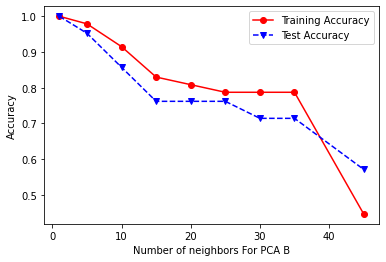

In [30]:
# next, we'll apply a knn algorithm to see (in terms of proximity) how close are the values in our pca to observations that have a stroke

# Use a nearest neighbor classifier to evaluate the methods

numNeighbors_B = [1, 5, 10, 15, 20, 25, 30,35, 45]
trainAccB = []
testAccB = []

for k in numNeighbors_B:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(PCA_B_train,yLbl_B_train.values.ravel())
    PCA_B_predTrain = clf1.predict(PCA_B_train)
    PCA_B_predTest = clf1.predict(PCA_B_test)
    trainAccB.append(accuracy_score(yLbl_B_train, PCA_B_predTrain))
    testAccB.append(accuracy_score(yLbl_B_test, PCA_B_predTest))

plt.plot(numNeighbors_B, trainAccB, 'ro-', numNeighbors_B, testAccB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors For PCA B')
plt.ylabel('Accuracy')

print(yLbl_B_test)

For C

In [28]:
# Load and check data

dataframeC = pd.read_csv('6. Dataset PCA File/MeterC_pca.csv')
#display(dataframeA.head())
dataframeC.head()

dataframeC = dataframeC.drop('Unnamed: 0', axis=1)

PCA_C_DF = dataframeC[['PC1','PC2','PC3','PC4','Class Attruibute']]

# yLbl is Class Attruibute labels

yLbl_C = dataframeC[['Class Attruibute']]

#featuresVector
PCA_C_DF

,PC1,PC2,PC3,PC4,Class Attruibute
0,0.862142,-0.721342,-0.890788,-0.798976,1
1,0.497805,-0.486963,-0.903597,-0.455523,1
2,0.487105,-0.534620,-1.269206,-0.022834,1
3,0.238855,-0.096537,-1.444971,-0.329189,1
4,0.812149,-0.926293,-0.721486,-0.074070,1
...,...,...,...,...,...
130,-0.194660,-0.713677,2.527489,0.976339,4
131,0.471404,-1.198182,1.691713,0.411921,4
132,0.763804,-1.239623,0.597530,0.297770,4
133,0.591995,-1.039563,1.140249,-1.414719,4


In [51]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
PCA_C_train, PCA_C_test, yLbl_C_train, yLbl_C_test = train_test_split(PCA_C_DF, yLbl_C, test_size=0.3, random_state=12)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

In [52]:
print("Training Set For C")
PCA_C_train

Training Set For C


,PC1,PC2,PC3,PC4,Class Attruibute
93,0.613178,-1.160312,-0.545043,-1.134795,3
115,1.959300,-2.740992,1.608032,-0.117781,4
107,-0.771979,0.164172,1.665030,-0.321938,3
23,0.264257,-0.241076,-0.542190,-1.088874,1
128,-0.119942,-0.593368,2.002312,0.198342,4
...,...,...,...,...,...
22,0.466854,-0.474082,-1.331220,0.051071,1
76,0.099414,-0.187430,-1.294996,-0.823552,3
3,0.238855,-0.096537,-1.444971,-0.329189,1
130,-0.194660,-0.713677,2.527489,0.976339,4


In [53]:
print("Testing Set For C")
PCA_C_test

Testing Set For C


,PC1,PC2,PC3,PC4,Class Attruibute
103,-0.846466,0.261705,0.761043,-0.310530,3
91,-1.280284,1.267573,-0.790310,0.588348,3
85,-0.849147,0.655245,-0.311600,0.316564,3
11,-1.137911,0.903365,-0.329767,0.760254,1
116,1.669157,-2.317114,1.630566,-0.692266,4
113,1.337355,-1.842117,0.930907,-0.669930,4
105,-1.048428,0.498234,1.948003,-1.016196,3
61,0.690839,-0.671199,-0.440730,-0.772569,3
31,-0.969016,0.716703,-0.012242,0.690211,1
122,-0.427762,-0.211166,1.848542,-0.199287,4


     Class Attruibute
103                 3
91                  3
85                  3
11                  1
116                 4
113                 4
105                 3
61                  3
31                  1
122                 4
24                  1
64                  3
83                  3
90                  3
1                   1
121                 4
15                  1
26                  1
40                  1
129                 4
21                  1
8                   1
69                  3
12                  1
10                  1
14                  1
66                  3
17                  1
39                  1
19                  1
7                   1
46                  1
81                  3
41                  1
77                  3
123                 4
94                  3
9                   1
5                   1
133                 4
95                  3


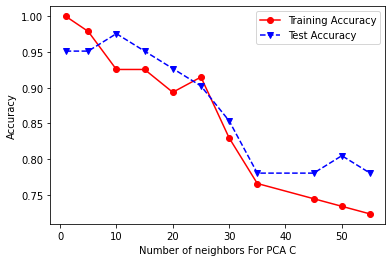

In [54]:
# next, we'll apply a knn algorithm to see (in terms of proximity) how close are the values in our pca to observations that have a stroke

# Use a nearest neighbor classifier to evaluate the methods

numNeighbors_C = [1, 5, 10, 15, 20, 25, 30,35, 45,50,55]
trainAccC = []
testAccC = []

for k in numNeighbors_C:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(PCA_C_train,yLbl_C_train.values.ravel())
    PCA_C_predTrain = clf1.predict(PCA_C_train)
    PCA_C_predTest = clf1.predict(PCA_C_test)
    trainAccC.append(accuracy_score(yLbl_C_train, PCA_C_predTrain))
    testAccC.append(accuracy_score(yLbl_C_test, PCA_C_predTest))

plt.plot(numNeighbors_C, trainAccC, 'ro-', numNeighbors_C, testAccC,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors For PCA C')
plt.ylabel('Accuracy')

print(yLbl_C_test)